In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as si

from mpl_toolkits.mplot3d import Axes3D

In [3]:
dd1 = yf.download("AMZN", start="2020-03-01", end="2021-03-01")
dd2 = yf.download("AMZN", start="2020-09-01", end="2021-02-28")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
dd1.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-02,1906.489990,1954.510010,1870.000000,1953.949951,1953.949951,6761700
2020-03-03,1975.369995,1996.329956,1888.089966,1908.989990,1908.989990,7534500
2020-03-04,1946.569946,1978.000000,1922.000000,1975.829956,1975.829956,4772900
2020-03-05,1933.000000,1960.719971,1910.000000,1924.030029,1924.030029,4748200
2020-03-06,1875.000000,1910.869995,1869.500000,1901.089966,1901.089966,5273600


In [5]:
dd2.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-08-31,3408.989990,3495.000000,3405.000000,3450.959961,3450.959961,4185900
2020-09-01,3489.580078,3513.870117,3467.000000,3499.120117,3499.120117,3476400
2020-09-02,3547.000000,3552.250000,3486.689941,3531.449951,3531.449951,3931500
2020-09-03,3485.000000,3488.409912,3303.000000,3368.000000,3368.000000,8161100
2020-09-04,3318.000000,3381.500000,3111.129883,3294.620117,3294.620117,8781800


In [6]:
log_return1 = np.log(dd2['Adj Close'] / dd2['Adj Close'].shift(1))

In [7]:
normal_return = []
for i in range(0,len(dd1)-1):
    adjclose_yesterday = dd1.iloc[i]['Adj Close']
    adjclose_today = dd1.iloc[i+1]['Adj Close']
    x = (adjclose_today - adjclose_yesterday) / adjclose_yesterday
    normal_return.append(x)
normal_return[:5]

[-0.023009781243647214,
 0.035013261547854564,
 -0.026216793909353386,
 -0.011922923825126474,
 -0.05285387976123124]

In [8]:
log_return = []
for i in range(0,len(dd1)-1):
    adjclose_yesterday = dd1.iloc[i]['Adj Close']
    adjclose_today = dd1.iloc[i+1]['Adj Close']
    y = np.log(adjclose_today / adjclose_yesterday)
    log_return.append(y)
log_return[:5]

[-0.023278638497808757,
 0.03441423972496012,
 -0.02656658113019581,
 -0.011994571954325777,
 -0.05430189966417348]

In [9]:
fn = pd.DataFrame(normal_return, columns = ['normal']) 
nr = fn.mean() * len(fn)
nv = fn.std() * (len(fn) ** 0.5)
print('Annulized normal return = %.8f' % nr)
print('Annulized by = %.8f' % nv)

Annulized normal return = 0.53111594
Annulized by = 0.37919106


In [10]:
log_return = np.log(dd1['Adj Close'] / dd1['Adj Close'].shift(1))
v = np.sqrt(252) * log_return.std()
print(round(v*100,2))

37.99


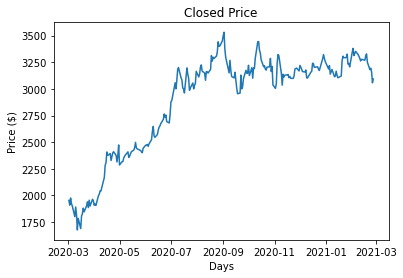

In [11]:
fig = plt.figure()
plt.plot(dd1['Close'])
plt.xlabel('Days')
plt.ylabel('Price ($)')
plt.title('Closed Price');

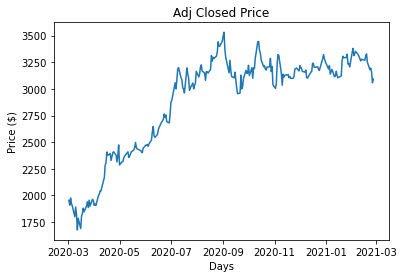

In [12]:
fig = plt.figure()
plt.plot(dd1['Adj Close'])
plt.xlabel('Days')
plt.ylabel('Price ($)')
plt.title('Adj Closed Price');

In [13]:
st, ttm = np.meshgrid(np.array([100, 110, 120, 130, 140]), np.array([6/12, 10/12]))
a2 = np.array([np.array([0.369229563, 0.360583371, 0.355315095, 0.356638788, 0.359157824]), 
               np.array([0.348106828, 0.354150754, 0.345219209, 0.346127746, 0.34955913])])
print(a2)

[[0.36922956 0.36058337 0.3553151  0.35663879 0.35915782]
 [0.34810683 0.35415075 0.34521921 0.34612775 0.34955913]]


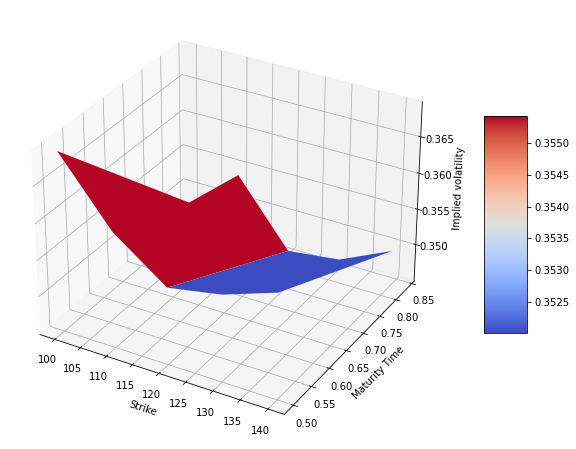

In [14]:
fig = plt.figure(figsize= (15, 8))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(st, ttm, a2, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.1, antialiased=True)
ax.set_xlabel('Strike')
ax.set_ylabel('Maturity Time')
ax.set_zlabel('Implied volatility')
fig.colorbar(surf, shrink=0.5, aspect=5,);

In [15]:
vol = np.sqrt(252) * log_return1.std()
print(round(vol*100,2))

33.4


In [16]:
def mcs_simulation_np(p):
    M = p
    I = p
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t]) 
    return S

In [17]:
T = 2/12
r = 0.015
sigma = 0.38
S0 = 3682
K = 3000

In [49]:
S = mcs_simulation_np(500)

In [51]:
S = np.transpose(S)
S

array([[3682.        , 3682.        , 3682.        , ..., 3682.        ,
        3682.        , 3682.        ],
       [3661.39089699, 3672.29517434, 3674.68151349, ..., 3667.35853678,
        3632.92373003, 3714.90941125],
       [3672.48540276, 3706.5345176 , 3698.61038425, ..., 3638.49577335,
        3595.83675035, 3704.78120298],
       ...,
       [5159.40965844, 3446.19217224, 3185.50883715, ..., 3619.30154283,
        3558.74420307, 3003.39887729],
       [5129.56465097, 3498.07834328, 3203.04041802, ..., 3619.73074087,
        3551.3844931 , 3012.99645761],
       [5192.38635324, 3517.27391283, 3242.314643  , ..., 3616.03263814,
        3600.71491128, 3002.96841551]])

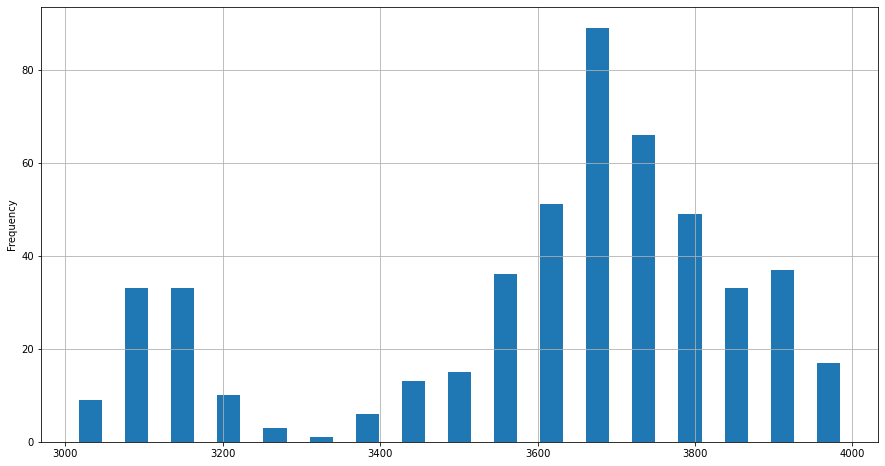

In [52]:
fig = plt.figure(figsize= (15, 8))
n, bins, patches = plt.hist(x=S[:,-1], bins='auto', rwidth=0.5)
plt.grid()
ax = plt.ylabel('Frequency')

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-preiod values')

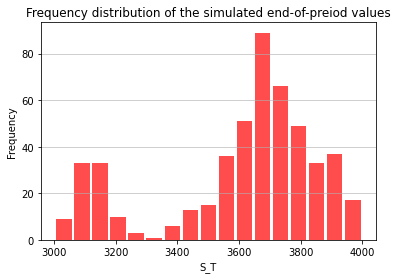

In [53]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=S[:,-1], bins='auto', color='red',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-preiod values')

In [54]:
pp = (K - S[-1,:])>0
bpp = np.mean(np.maximum(pp.astype(int),0))
print('Using Monte Carlo Simulation binary put option price is', str(bpp))

Using Monte Carlo Simulation binary put option price is 0.116


In [55]:
bpc = np.mean(np.maximum(cp.astype(int),0))
print('Using Monte Carlo Simulation binary call option price is', str(bpc))

Using Monte Carlo Simulation binary call option price is 1.0


In [56]:
bpc + bpp

1.116

In [48]:
def binary_option_bsm(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = np.exp(-q * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        option_value = np.exp(-q * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

In [58]:
binary_option_bsm(3286, 3000, 2/12, 0.015, 0, 0.38, 'put')

0.2996126826648554

In [59]:
binary_option_bsm(3286, 3000, 2/12, 0.015, 0, 0.38, 'call')

0.7003873173351446

In [60]:
binary_option_bsm(3286, 3000, 2/12, 0.015, 0, 0.38, 'put')+binary_option_bsm(3286, 3000, 2/12, 0.015, 0, 0.38, 'call')

1.0

In [61]:
def delta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(-r * T) * si.norm.pdf(d2, 0.0, 1.0)/(vol * S * np.sqrt(T))
    elif payoff == "put":
        delta =  - np.exp(-r * T) * si.norm.pdf(d2, 0.0, 1.0)/(vol * S * np.sqrt(T))
    
    return delta

In [62]:
print ('Delta of Binary call option is',delta (3286, 3000, 2/12, 0.015, 0, 0.38, 'call'))

Delta of Binary call option is 0.0006799549750568866


In [90]:
print ('Delta of Binary put option is',delta (3286, 3000, 2/12, 0.015, 0, 0.38, 'put'))

Delta of Binary put option is -0.0006799549750568866


In [64]:
S = np.linspace(50,150,11)
Delta_Call = np.zeros((len(S),1))
Delta_Put = np.zeros((len(S),1))
for i in range(len(S)):
    Delta_Call [i] = delta(S[i], 3000, 2/12, 0.015, 0, 0.38, 'call')
    Delta_Put [i] = delta(S[i], 3000, 2/12, 0.015, 0, 0.38, 'put')

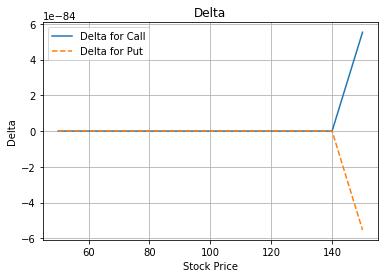

In [65]:
fig = plt.figure()
plt.plot(S, Delta_Call, '-')
plt.plot(S, Delta_Put, '--')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Delta')
plt.title('Delta')
plt.legend(['Delta for Call','Delta for Put'])

In [66]:
def gamma(S, K, T, r, q, vol, payoff):
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        gamma = -(np.exp(-r * T) * d1* si.norm.pdf(d2, 0.0, 1.0) / (vol**2 * S**2 *(T)))
    elif payoff == "put":
        gamma = (np.exp(-r * T) * d1* si.norm.pdf(d2, 0.0, 1.0) / (vol**2 * S**2 *(T)))
    return gamma

In [67]:
print ('Gamma of Binary call option is',gamma(3286, 3000, 2/12, 0.015, 0, 0.38, 'call'))

Gamma of Binary call option is -9.078789235190235e-07


In [91]:
print ('Gamma of Binary put option is',gamma(3286, 3000, 2/12, 0.015, 0, 0.38, 'put'))

Gamma of Binary put option is 9.078789235190235e-07


In [69]:
S = np.linspace(50,150,11)
Gamma = np.zeros((len(S),1))
for i in range(len(S)):
    Gamma [i] = gamma(S[i], 3000, 2/12, 0.015, 0, 0.38, 'call')

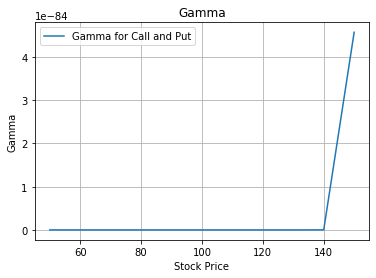

In [70]:
fig = plt.figure()
plt.plot(S, Gamma, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Gamma')
plt.title('Gamma')
plt.legend(['Gamma for Call and Put'])

In [71]:
def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  -1 * (T * np.exp(-r*T)*si.norm.cdf(d2, 0.0, 1.0)) + (((np.sqrt(T))/vol) * np.exp (-r * T) * si.norm.pdf(d2, 0.0, 1.0))
    elif payoff == "put":
        rho = -1 * (T * np.exp(-r*T)*(1-si.norm.cdf(d2, 0.0, 1.0))) - (((np.sqrt(T))/vol) * np.exp (-r * T) * si.norm.pdf(d2, 0.0, 1.0))
    
    return rho

In [72]:
print ('Rho of Binary call option is', rho(3286, 3000, 2/12, 0.015, 0, 0.38, 'call'))

Rho of Binary call option is 0.25594891868459035


In [92]:
print ('Rho of Binary put option is', rho(3286, 3000, 2/12, 0.015, 0, 0.38, 'put'))

Rho of Binary put option is -0.42219943908416696


In [77]:
r = np.linspace(0,0.4,5)
Rho_Call = np.zeros((len(r),1))
Rho_Put = np.zeros((len(r),1))
for i in range(len(r)):
    Rho_Call [i] = rho(3286, 3000, 2/12, r[i], 0, 0.38, 'call')
    Rho_Put [i] = rho(3286, 3000, 2/12, r[i], 0, 0.38, 'put')

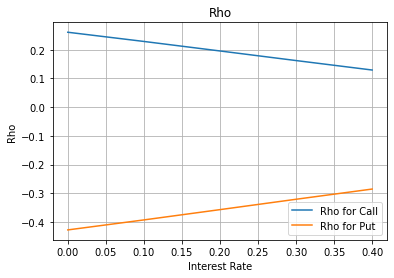

In [78]:
fig = plt.figure()
plt.plot(r, Rho_Call, '-')
plt.plot(r, Rho_Put, '-')
plt.grid()
plt.xlabel('Interest Rate')
plt.ylabel('Rho')
plt.title('Rho')
plt.legend(['Rho for Call', 'Rho for Put'])

In [79]:
def vega(S, K, T, r, q, vol, payoff):
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        vega = -((np.exp(-r * T) * si.norm.pdf(d2, 0.0, 1.0)) * ((np.sqrt(T)) + (d2/vol)))
    elif payoff == "put":
        vega = (np.exp(-r * T) * si.norm.pdf(d2, 0.0, 1.0)) * ((np.sqrt(T)) + (d2/vol))
    return vega

In [80]:
print ('Vega of Binary call option is',vega(3286, 3000, 2/12, 0.015, 0, 0.38, 'call'))

Vega of Binary call option is -0.6208624558943411


In [93]:
print ('Vega of Binary put option is',vega(3286, 3000, 2/12, 0.015, 0, 0.38, 'put'))

Vega of Binary put option is 0.6208624558943411


In [83]:
vol = np.linspace(0.1,0.6,13)
Vega = np.zeros((len(vol),1))
for i in range(len(vol)):
    Vega [i] = vega(3286, 3000, 2/12, 0.15, 0, vol[i], 'call')

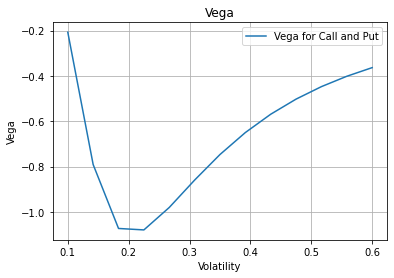

In [84]:
fig = plt.figure()
plt.plot(vol, Vega, '-')
plt.grid()
plt.xlabel('Volatility')
plt.ylabel('Vega')
plt.title('Vega')
plt.legend(['Vega for Call and Put'])

In [85]:
def speed(S, K, T, r, q, vol, payoff):
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        speed =-((np.exp(-r*T)*si.norm.pdf(d2,0.0,1))/(vol**2*S**3*T))*(-2*d1 + (1-d1*d2)/(vol*np.sqrt(T)))
    elif payoff == "put":
        speed =((np.exp(-r*T)*si.norm.pdf(d2,0.0,1))/(vol**2*S**3*T))*(-2*d1 + (1-d1*d2)/(vol*np.sqrt(T)))
    return speed

In [86]:
print ('Speed of Binary call option is', speed(3286, 3000, 2/12, 0.015, 0, 0.38,'call'))

Speed of Binary call option is -1.1280593901545698e-09


In [94]:
print ('Speed of Binary put option is', speed(3286, 3000, 2/12, 0.015, 0, 0.38,'put'))

Speed of Binary put option is 1.1280593901545698e-09


In [88]:
S = np.linspace(80,180,15)
Speed = np.zeros((len(S),1))
for i in range(len(S)):
    Speed [i] = speed(S[i], 100, 1, 0.05, 0.03, 0.25, 'call')

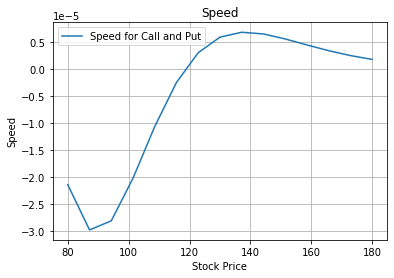

In [89]:
fig = plt.figure()
plt.plot(S, Speed, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Speed')
plt.title('Speed')
plt.legend(['Speed for Call and Put'])